## Bengluru House Price With Support Vector Regression

Dataset: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [49]:
df= pd.read_csv("C:/Users/Susheel Yadav/Desktop/Bengaluru_House_Data.csv")

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [50]:
df.shape

(13320, 9)

In [51]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [52]:
df1= df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [53]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [54]:
df2=df1.dropna()

df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [55]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [56]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\Susheel Yadav\AppData\Local\Temp\ipykernel_9592\3716419620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [57]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [58]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [59]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [60]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [61]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [62]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [63]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [64]:
convert_sqft_to_num('2000 - 6000')


4000.0

In [65]:
convert_sqft_to_num('34.46Sq. Meter')

In [66]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [67]:
df3 = df2.copy()
df3['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [68]:
df3 = df3.dropna()

df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [69]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [70]:
df3.loc[60]

location      Tharabanahalli
size               3 Bedroom
total_sqft            4395.0
bath                     3.0
price                  240.0
bhk                        3
Name: 60, dtype: object

In [71]:
len(df3.location.unique())

1298

In [72]:
df3.location = df3.location.apply(lambda x:x.strip()) #remove extra space
#here location_stats is series

location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [73]:
len(location_stats[location_stats <= 10])

1047

In [74]:
location_stats_lessthan_10 = location_stats[location_stats <= 10]
location_stats_lessthan_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [75]:
len(df3.location.unique())

1287

In [76]:
df3.location = df3.location.apply(lambda x: 'Other' if x in location_stats_lessthan_10 else x)

#transfering all location which have less number of rows to other

len(df3.location.unique())

241

In [77]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Other,6 Bedroom,1020.0,6.0,370.00,6


In [78]:
df3 = df3.drop(["size"], axis = "columns")

In [79]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [80]:
df3.shape

(13200, 5)

In [81]:
dummies= pd.get_dummies(df3.location) #one-hot-encoding
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df4 = pd.concat([df3,dummies.drop('Other',axis ='columns')],axis = 'columns')
# as in dummies we must drop one column, hence other column is dropped
df4.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df5= df4.drop('location',axis='columns')
df5.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df5.shape

(13200, 244)

In [85]:
len(df5.price.unique())

1952

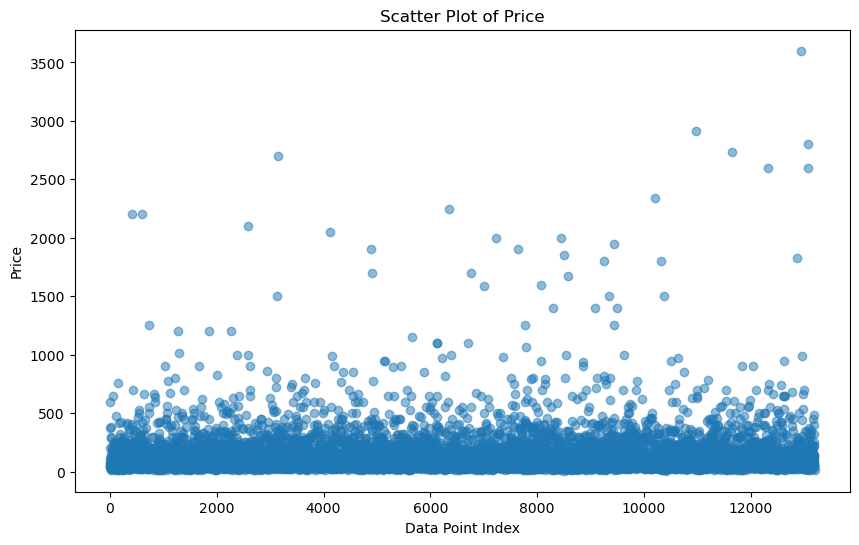

In [86]:
plt.figure(figsize = (10, 6)) 
plt.scatter(range(len(df5['price'])), df5['price'], alpha=0.5)
plt.title('Scatter Plot of Price')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.show()

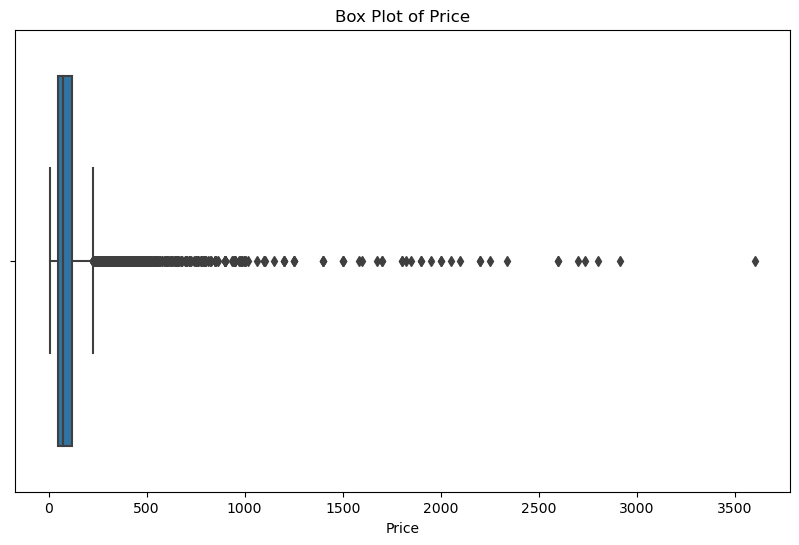

In [87]:
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.boxplot(x = df5['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

In [88]:
df5['log_price'] = np.log(df5['price']+ 1e-6)

print(df5.head())

   total_sqft  bath   price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      1056.0   2.0   39.07    2                    0                   0   
1      2600.0   5.0  120.00    4                    0                   0   
2      1440.0   2.0   62.00    3                    0                   0   
3      1521.0   3.0   95.00    3                    0                   0   
4      1200.0   2.0   51.00    2                    0                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0       

### In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?

In [89]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df5.drop('log_price', axis = 'columns')
y = df5.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel = 'linear')

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-squared (R²): {r_squared:.2f}')

MSE: 0.01
RMSE: 0.09
MAE: 0.09
R-squared (R²): 1.00


In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(model, X, y, cv = cv)

array([0.99999962, 0.99999948, 0.99999967, 0.99999954, 0.99999957])

All of these metrics are relevant and should be employed to evaluate our SVM regression model comprehensively. However, the choice of the "best" metric depends on our specific goals and what you want to emphasize in your evaluation:

If we want to emphasize prediction accuracy and assess how far off your model's predictions are from the actual house prices, MSE, RMSE, and MAE are suitable metrics.

If we want to understand how much of the variance in house prices our model can explain, R-squared provides that information.

In practice, it's often a good idea to use a combination of these metrics to gain a well-rounded view of our model's performance. For example, we might use MSE and R-squared together to assess both prediction accuracy and explanatory power. Additionally, consider using visualizations and domain knowledge to interpret and communicate the results effectively.

### You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?

If our primary goal is to predict the actual price of a house as accurately as possible, then Mean Squared Error (MSE) would be the more appropriate evaluation metric.

Here's why:

1. **MSE Measures Prediction Accuracy:** MSE directly quantifies the average squared difference between model's predictions and the actual house prices. It penalizes larger prediction errors more heavily, which is often a desirable property when main objective is to minimize prediction errors. In other words, it prioritizes accuracy.

2. **Focus on Prediction Error Magnitude:** MSE provides a clear indication of how far off, on average, your model's predictions are from the true prices. For applications where we need to minimize the financial impact of prediction errors (such as in real estate), knowing the magnitude of these errors is crucial.

3. **Easier Interpretation in Units of the Target Variable:** MSE is measured in the same units as the target variable (house prices in this case), making it easy to interpret. For example, if the MSE is 1000, it means your model's predictions are off by an average of 1000 units (in the currency or measurement unit of house prices).

While R-squared (R²) is a valuable metric for understanding the proportion of variance in the target variable explained by our model, it doesn't directly measure prediction accuracy in the same way MSE does. R² focuses more on the goodness of fit and the proportion of variance explained, which might be more relevant when you want to understand the model's overall performance or the percentage of variability in house prices that your model captures.

###  You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

When dealing with a dataset that has a significant number of outliers and using an SVM regression model, the most appropriate regression metric to consider is the **Median Absolute Error (MedAE)**.

Here's why MedAE is a suitable choice in this scenario:

1. **Robustness to Outliers:** MedAE is less sensitive to outliers compared to metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE). Instead of averaging the absolute errors, it computes the median of the absolute errors. The median is less affected by extreme values because it's not influenced by the magnitude of outliers, making it robust in the presence of outliers.

2. **Median Interpretation:** The MedAE is straightforward to interpret. It represents the median magnitude of prediction errors in the original units of the target variable. For example, if the MedAE is 10, it means that, on average, model's predictions are off by 10 units (in the same measurement as your target variable).

3. **Handling Outliers:** Since SVM models are sensitive to outliers, using a robust metric like MedAE helps focus on the typical prediction error while downplaying the influence of outliers. This can lead to a more accurate representation of the model's performance, especially when the dataset contains significant outliers.

4. **Balance Between Bias and Variance:** MedAE balances the trade-off between bias and variance in the presence of outliers. While it may not be as efficient at capturing the full variability as metrics like R-squared (R²) or MSE, it provides a more robust assessment of prediction error.

5. **Visualization:** MedAE can be helpful in visualizing the spread of prediction errors, particularly when creating residual plots or diagnostic plots. It allows you to assess the central tendency of errors while revealing the presence of outliers.

### You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

In [91]:
model1 = SVR(kernel ='poly', degree = 3)

model1.fit(X_train_scaled, y_train)

predictions = model1.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 18721.750601664367
Root Mean Squared Error (RMSE): 136.8274482757914


When we have built an SVM regression model using a polynomial kernel and find that both Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are very close, it's generally appropriate to choose the **RMSE** as the preferred evaluation metric for the following reasons:

1. **Interpretability:** RMSE is a more interpretable metric compared to MSE because it's measured in the same units as the target variable. In the context of our regression problem, the RMSE value directly represents the average prediction error in the original units of the target variable, making it easier to communicate and understand.

2. **Root Transformation:** The RMSE inherently incorporates a square root transformation, which balances the emphasis on larger errors and smaller errors. This is valuable because it gives more weight to larger errors, which can be more consequential in practice.

3. **Comparability:** RMSE is more directly comparable to the scale of our data, which can be helpful when discussing the magnitude of prediction errors with stakeholders or when comparing model performance across different datasets or scenarios.

4. **Visual Assessment:** RMSE is particularly useful when creating residual plots or diagnostic plots because it provides a more meaningful y-axis scale, making it easier to visualize the spread of prediction errors and identify patterns in residuals.

While MSE and RMSE are closely related and often yield similar results, RMSE has the advantage of being more interpretable and aligning better with the typical use case of regression evaluation. However, keep in mind that both metrics can be valuable, and it's a good practice to report both when assessing model performance.

### You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

In [94]:
kernel_names = ["Linear", "Polynomial", "RBF"]
kernel_models = {"Linear": SVR(kernel = 'linear'),
                 "Polynomial": SVR(kernel= 'poly', degree = 3), 
                 "RBF": SVR(kernel = 'rbf')}

results = {"Kernel": [], "R-squared": []}

for kernel_name, model2 in kernel_models.items():
    model2.fit(X_train_scaled, y_train)

    y_pred = model2.predict(X_test_scaled)

    r_squared = r2_score(y_test, y_pred)

    results["Kernel"].append(kernel_name)
    results["R-squared"].append(r_squared)

results_df = pd.DataFrame(results)

print(results_df)

       Kernel  R-squared
0      Linear   1.000000
1  Polynomial   0.022168
2         RBF   0.192208


If our goal is to measure how well different SVM regression models explain the variance in the target variable and we are comparing models with different kernels (linear, polynomial, and RBF), then the most appropriate evaluation metric to consider is the **R-squared (R²) score**.

Here's why R-squared is suitable for this purpose:

1. **Explained Variance:** R-squared quantifies the proportion of the variance in the target variable that is explained by our regression model. In other words, it measures the goodness of fit of the model to the data, indicating how well the model captures the underlying patterns and variability in the target variable.

2. **Comparability:** R-squared is a standardized metric that ranges from 0 to 1. A higher R-squared value indicates that a larger portion of the variance is explained by the model. This makes it easy to compare different models with various kernels and assess their relative abilities to capture variance.

3. **Model Selection:** When we're comparing models with different kernels (linear, polynomial, RBF), R-squared provides a consistent measure to evaluate and choose the model that best fits our data. Higher R-squared values generally indicate better fit.

4. **Interpretability:** R-squared has a straightforward interpretation. An R² of 0 means that the model does not explain any variance in the target variable, while an R² of 1 means that the model explains all of the variance.